Naive Bayes

The Naive Bayes classifier is a probabilistic machine learning model used for classification tasks. It is based on Bayes' theorem, with the "naive" assumption that features (or predictors) are independent given the class. Despite this often unrealistic assumption of feature independence, Naive Bayes classifiers perform surprisingly well in many real-world applications, particularly in text classification and natural language processing.

1. Data Exploration and Preprocessing

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Try reading the file, handling potential errors
try:
    data = pd.read_csv("/content/blogs_categories.csv")
    print(data)  # Print the data if successfully read
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")

    data = pd.read_csv("/content/blogs_categories.csv", quoting=3, on_bad_lines='skip')  # Use on_bad_lines='skip' to skip problematic lines
    print(data)  # Print the data after attempting to fix the issue

       Unnamed: 0                                               Data  \
0               0  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...   
1               1  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
2               2  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
3               3  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
4               4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...   
...           ...                                                ...   
19992       19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   
19993       19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...   
19994       19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   
19995       19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....   
19996       19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...   

                   Labels  
0             alt.atheism  
1             alt.atheism  
2             alt.atheism  
3             alt.athei

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [29]:
data.describe()

,Unnamed: 0
count,19997.000000
mean,9998.000000
std,5772.781002
min,0.000000
25%,4999.000000
50%,9998.000000
75%,14997.000000
max,19996.000000


In [30]:
data.isnull().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

In [31]:
data[data.duplicated()]

,Unnamed: 0,Data,Labels


In [32]:
data.drop_duplicates()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [33]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK data files (run this once)
import nltk
nltk.download('punkt') # Download the 'punkt' resource
nltk.download('stopwords')

# Function to clean text
def preprocess_text(text):
    # Handle potential non-string values
    if not isinstance(text, str):
        return ""  # Or handle it in a way that makes sense for your data

    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Load stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)

# Apply preprocessing
data['cleaned_text'] = data['Data'].apply(preprocess_text)
data['cleaned_text']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        xref cantaloupesrvcscmuedu altatheism49960 alt...
1        xref cantaloupesrvcscmuedu altatheism51060 alt...
2        newsgroups altatheism path cantaloupesrvcscmue...
3        xref cantaloupesrvcscmuedu altatheism51120 alt...
4        xref cantaloupesrvcscmuedu altatheism51121 soc...
                               ...                        
19992    xref cantaloupesrvcscmuedu altatheism54482 tal...
19993    xref cantaloupesrvcscmuedu altatheism54485 tal...
19994    xref cantaloupesrvcscmuedu talkreligionmisc845...
19995    xref cantaloupesrvcscmuedu talkreligionmisc845...
19996    xref cantaloupesrvcscmuedu talkabortion121820 ...
Name: cleaned_text, Length: 19997, dtype: object

In [34]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
x= tfidf_vectorizer.fit_transform(data['cleaned_text'])

# The labels for classification
y = data['Labels']


Index(['Unnamed: 0', 'Data', 'Labels', 'cleaned_text'], dtype='object')


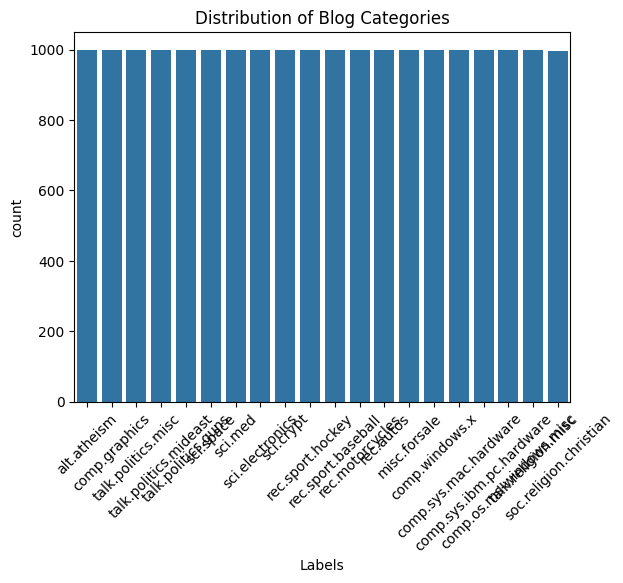

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the column names in your DataFrame
print(data.columns)

# Replace 'blog_category' with the actual column name for categories
sns.countplot(data=data, x='Labels', order=data['Labels'].value_counts().index) # Replace 'Labels' with the correct column name

plt.title('Distribution of Blog Categories')
plt.xticks(rotation=45)
plt.show()

2. Naive Bayes Model for Text Classification

In [36]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train,y_train


(<15997x258828 sparse matrix of type '<class 'numpy.float64'>'
 	with 2116539 stored elements in Compressed Sparse Row format>,
 5748             comp.windows.x
 1688              comp.graphics
 8174            rec.motorcycles
 10194          rec.sport.hockey
 4667      comp.sys.mac.hardware
                   ...          
 11284                 sci.crypt
 11964                 sci.crypt
 5390             comp.windows.x
 860                 alt.atheism
 15795    soc.religion.christian
 Name: Labels, Length: 15997, dtype: object)

In [37]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(x_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(x_test)
y_pred


array(['rec.sport.hockey', 'comp.sys.mac.hardware',
       'comp.sys.ibm.pc.hardware', ..., 'rec.motorcycles',
       'talk.politics.guns', 'comp.windows.x'], dtype='<U24')

3. Sentiment Analysis

In [38]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

# Display sentiment distribution
print(data['sentiment'].value_counts())


sentiment
positive    14255
negative     5724
neutral        18
Name: count, dtype: int64


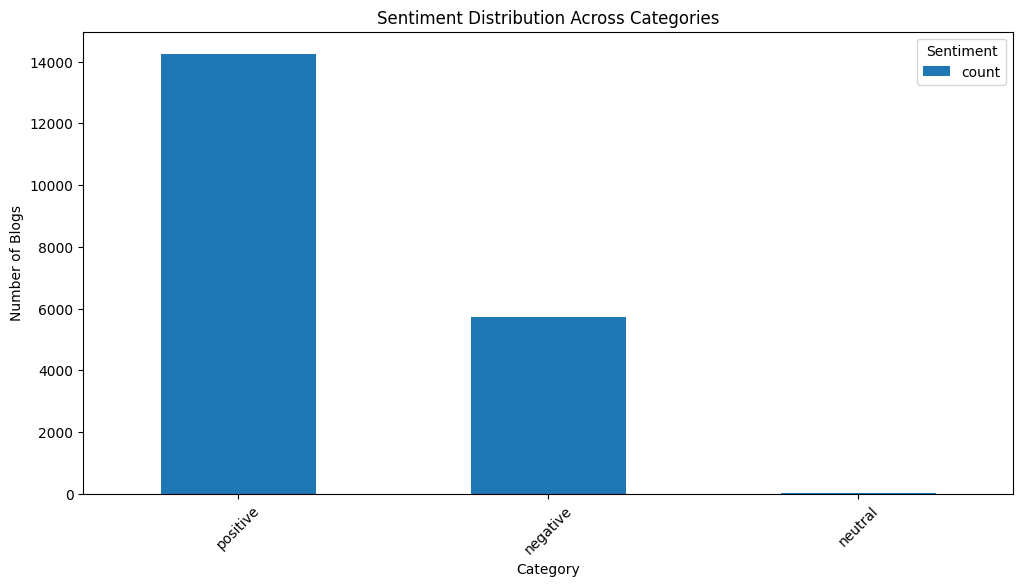

In [40]:
# Visualize sentiment distribution across categories
plt.figure(figsize=(12, 6))

# Calculate sentiment distribution (replace this with your actual calculation)
sentiment_distribution = data['sentiment'].value_counts()

sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories')
plt.ylabel('Number of Blogs')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

4. Evaluation

In [41]:
# Calculate evaluation metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.75       173
           comp.graphics       0.87      0.91      0.89       179
 comp.os.ms-windows.misc       0.93      0.88      0.91       226
comp.sys.ibm.pc.hardware       0.85      0.86      0.85       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.97      0.94      0.96       186
            misc.forsale       0.91      0.78      0.84       190
               rec.autos       0.92      0.94      0.93       203
         rec.motorcycles       1.00      0.97      0.98       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.90      0.98      0.94       200
         sci.electronics       0.94      0.90      0.92       227
                 sci.med       1.00      0.95      0.98       196
         

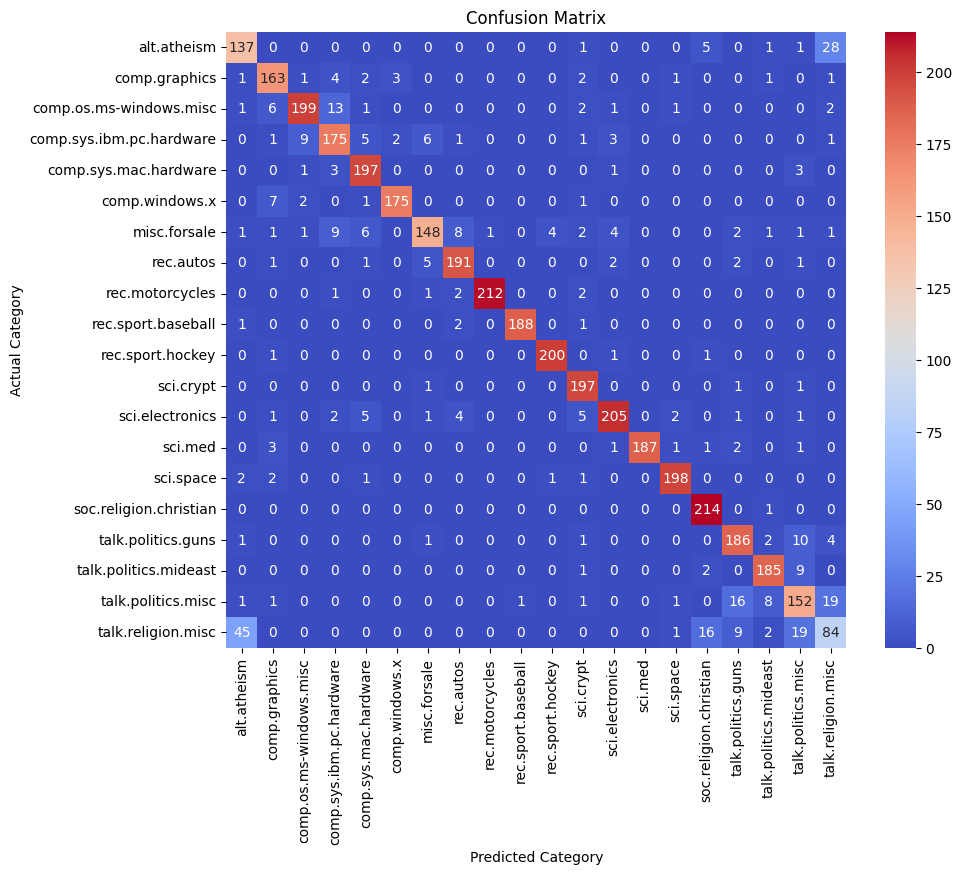

In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Category')
plt.xlabel('Predicted Category')
plt.show()


In conclusion, the Naive Bayes classifier, with proper preprocessing and feature extraction, can effectively categorize blog posts. Performance evaluation using metrics such as accuracy, precision, recall, and F1-score provides a comprehensive view of the model’s effectiveness. Challenges such as class imbalance and text preprocessing need careful handling to ensure robust performance.

Sentiment analysis adds another layer of understanding, revealing the emotional tone of the blog posts. These insights can be crucial for content strategy, reader engagement, and marketing efforts.

By combining text classification with sentiment analysis, you gain a powerful toolkit for extracting and leveraging insights from textual data, enhancing both the analytical and strategic capabilities of your organization.